# Homework 3:

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
drive.mount('/content/drive')

In [2]:
#Reads in the csv file
ny_complaint = pd.read_csv('/content/drive/My Drive/NYPD_Complaint_Data_2016-2019.csv', delimiter = ',', decimal = '.',encoding = 'ISO-8859-1')

# 1. Non-graphical: Number of suspects per age group

In [3]:
#group the data by age group and count the number of records, select the top 6 to get all the relevant age groups
ny_complaint_age_counts = ny_complaint.groupby('SUSP_AGE_GROUP').count().sort_values('CMPLNT_NUM', ascending = False).head(6)
ny_complaint_age_counts['Number of suspects per age group'] = ny_complaint_age_counts['CMPLNT_NUM']

#remove the Unknown age group
ny_complaint_age_counts = ny_complaint_age_counts.iloc[1:]

#create a table to show the number of crimes per age group
ny_complaint_age_counts[['Number of suspects per age group']]

,Number of suspects per age group
SUSP_AGE_GROUP,
25-44,467668
18-24,178983
45-64,173822
<18,54892
65+,15196


# Describtion:

This representation shows the number of crimes committed by suspects in different age groups. This gives insights into the age groups of suspects that commit the most crimes and can help to inform law enforcment and policy decisions, which ag groups should get focused on in terms of prevention and intervention.
It is a fair representation, because it allows the viewer to easily compare the different age groups and get information this way.

# 2. Non-graphical: Number of victims per age group

In [4]:
#group the data by age group and count the number of records, select the top 5 to get all the relevant age groups
ny_complaint_age_counts_vic = ny_complaint.groupby('VIC_AGE_GROUP').count().sort_values('CMPLNT_NUM', ascending = False).head(6)
ny_complaint_age_counts_vic['Number of victims per age group'] = ny_complaint_age_counts_vic['CMPLNT_NUM']
ny_complaint_age_counts_vic = ny_complaint_age_counts_vic.drop(index='UNKNOWN')

#create a table to show the number of crimes per age group
ny_complaint_age_counts_vic[['Number of victims per age group']]

,Number of victims per age group
VIC_AGE_GROUP,
25-44,642616
45-64,345826
18-24,182671
<18,82541
65+,77503


# Description:

This representation provides insights into the age distribution of crime victims. This helps the viewer to understand which age groups are more affected by crimes and identify risks  for certain age groups. This could help to inform crime prevention efforts for these groups. It is a fair representation of the data, because it allows the viewer to easily compare the victim age groups and get information out of it.

# 3. Non-graphical: Number of completed and attempted crimes

In [5]:
#count completed and attempted crimes
crime_status_table = ny_complaint['CRM_ATPT_CPTD_CD'].value_counts().to_frame()

#rename the columns
crime_status_table.columns = ['Count']

#calculate the percentage
crime_status_table['Percentage of total'] = (crime_status_table['Count'] / crime_status_table['Count'].sum()) * 100

#show the table
crime_status_table[['Count', 'Percentage of total']]

,Count,Percentage of total
COMPLETED,1842000,98.309629
ATTEMPTED,31672,1.690371


# Description:

This representation shows the count of the number of completed and attempted crimes. This can help to understand whether more crimes are attempted or completed and in which amount the law enforcment can stop crimes. This is a fair representation of the data, as it gives a accurate reflection of the completed and attempted crimes in total.

# 1. Graphical: Crime by Borough and Type as a bar chart



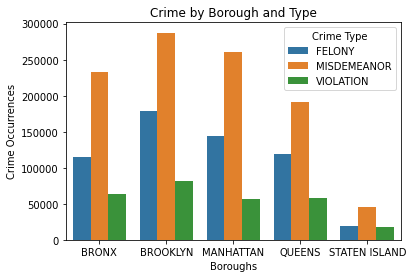

In [6]:
#create new df with the columns 'BORO_NM', 'LAW_CAT_CD' and 'Occurrences'
df = ny_complaint.groupby(['BORO_NM','LAW_CAT_CD']).size().reset_index(name='Occurrences')

#create bar chart, set labels and title
sns.barplot(data=df, x='BORO_NM', y='Occurrences', hue='LAW_CAT_CD')
plt.xlabel('Boroughs')
plt.ylabel('Crime Occurrences')
plt.title('Crime by Borough and Type')
plt.legend(title='Crime Type')
plt.show()

# Describtion:

This is bar plot shows the occurrences of different crime types in each borough. It allows us to see the relative crime rates between boroughs and the type of crime that are more likely in certain boroughs. It is a fair representation of the data, because it accurately shows the number of occurrences of each crime type and brough and allows the viewer a direct comparison of the different boroughs.

# 2. Graphical: Number of crime complaints for every hour of the day

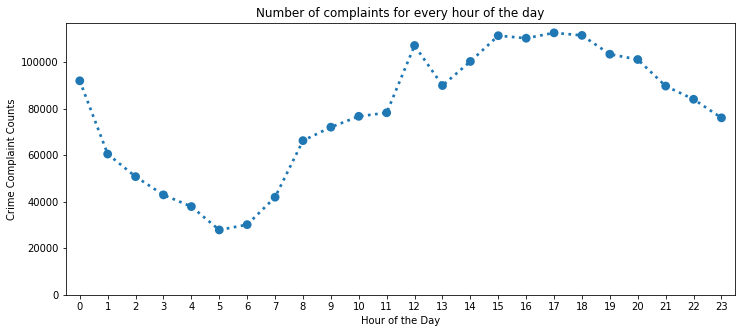

In [7]:
#create a new column 'hour' that extracts the hour from 'CMPLNT_FR_TM'
ny_complaint['hour'] = pd.to_datetime(ny_complaint['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour

#group the data by 'hour' and get the count of occurrences
df = ny_complaint.groupby(['hour']).size().reset_index(name='counts')

#create a pointplot, set labels and title
plt.figure(figsize = (12,5))
g = sns.pointplot(data = df, x ='hour', y = 'counts', linestyles=':')
g.set(xlabel='Hour of the Day', ylabel='Crime Complaint Counts', ylim = 0)
plt.title('Number of complaints for every hour of the day')
plt.show()

# Description:

This pointplot shows the number of crime complaints by hour of the day. It shows the exact number of complaints for each hour of the day and helps to get a picture of the temporal patterns of crime. This can help to to identify any unusual patterns or spikes in crime. It is a fair representation of the data, because it shows the number of complaints in an clear and easy to understand way. The pointplot also allows the viewer to see patterns or spikes in the data.

# 3. Graphical: Number of crime Occurrences for the top 30 Premises Types


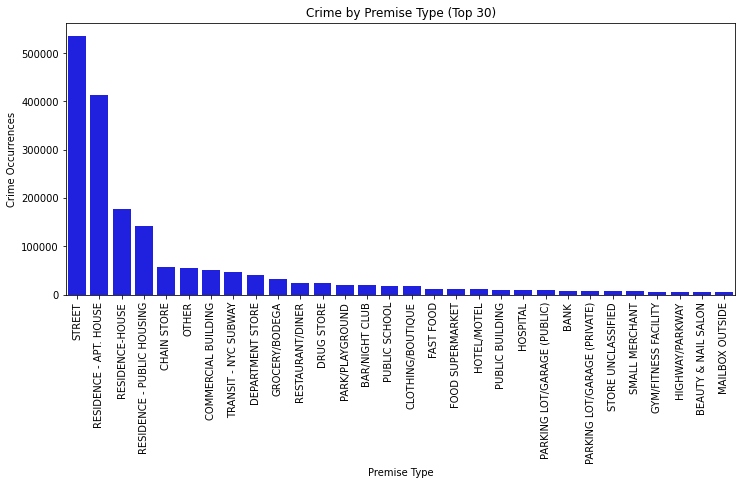

In [8]:
#group the data by 'PREM_TYP_DESC' and get the count of occurrences
df = ny_complaint.groupby(['PREM_TYP_DESC']).size().reset_index(name='counts')
df = df.sort_values(by='counts', ascending=False).head(30)

#create a bar chart, set labels and title
plt.figure(figsize = (12,5))
sns.barplot(data = df, x='PREM_TYP_DESC', y='counts', color = 'blue')
plt.xticks(rotation = 90)
plt.xlabel('Premise Type')
plt.ylabel('Crime Occurrences')
plt.title('Crime by Premise Type (Top 30)')
plt.show()

# Description:

This representation shows the top 30 premises types with the highest crime occurrence. It can help to gain information where crimes are more likely. This information can be used to inform policing strategies and to use their ressources more effectively. It is a fair representation of the data, because it allows the viewer to easily see in which premises crime is more likely to occurre and comparing the number of occurrences at the different premises types.

# 4. Graphical: Average Number of complaints for each month in the period from 2016 to 2019

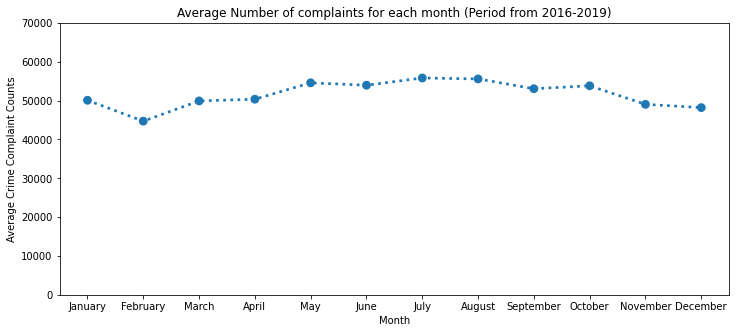

In [9]:
#convert 'CMPLNT_FR_DT' to datetime and extract month 
ny_complaint.loc[:,'CMPLNT_FR_DT'] = pd.to_datetime(ny_complaint['CMPLNT_FR_DT'], format='%m/%d/%Y', errors = 'coerce')
ny_complaint.loc[:,'month'] = ny_complaint['CMPLNT_FR_DT'].dt.month

#drop NaN values
ny_complaint_month = ny_complaint.dropna(subset=['month']).copy()

#astype int to be able to use the calender function and assign month names
ny_complaint_month.loc[:,"month"] = ny_complaint_month["month"].astype(int)
ny_complaint_month.loc[:,'month']= ny_complaint_month['month'].apply(lambda x: calendar.month_name[x])

#order after month, else april would be first
ny_complaint_month.loc[:,'month'] = pd.Categorical(ny_complaint_month['month'], categories=calendar.month_name[1:13], ordered=True)

#filter dataframe to only include rows between 2016 and 2019
ny_complaint_2016_2019 = ny_complaint_month[(ny_complaint_month['CMPLNT_FR_DT'].dt.year >= 2016) & (ny_complaint_month['CMPLNT_FR_DT'].dt.year <= 2019)]

#group the data by month and calculate the average number of complaints for each month
monthly_averages = ny_complaint_2016_2019.groupby(['month']).size().reset_index(name = 'counts')
monthly_averages['counts'] = monthly_averages['counts'] / 3

#create a pointplot, set labels and title
plt.figure(figsize = (12,5))
g = sns.pointplot(data = monthly_averages, x ='month', y = 'counts', linestyles=':')
g.set(xlabel='Month', ylabel='Average Crime Complaint Counts', ylim = (0,70000))
plt.title('Average Number of complaints for each month (Period from 2016-2019)')
plt.show()

# Description:

This representation shows  the average number of complaints for each months between the period of 2016-2019. The viewer can get insights in any patterns or trends in the number of complaints in certain months. This could help to identify seasonal trends in crime. It is a fair representation of the data because it allows the viewer to easily compare the averages of the months with each other and get a good overview over the data.

# 5. Graphical: Top 10 Housing Developments with crime Occurrence compared to the average

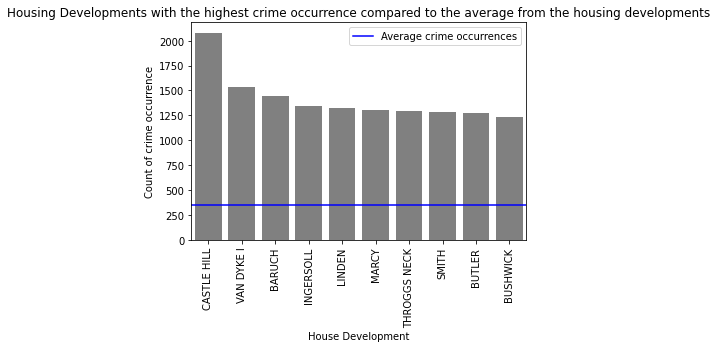

In [10]:
# group data by 'HADEVELOPT' and calculate the count of occurrences for each value
HADEVELOPT_counts = ny_complaint.groupby(['HADEVELOPT']).size().reset_index(name = 'counts')

# sort the dataframe by counts in descending order and select the top 10 values
HADEVELOPT_counts = HADEVELOPT_counts.sort_values(by='counts', ascending=False).head(10)

# calculate the average number of occurrences for 'HADEVELOPT' column
average_count = ny_complaint['HADEVELOPT'].count() / len(ny_complaint['HADEVELOPT'].unique())

# create a bar chart using seaborn
ax = sns.barplot(data=HADEVELOPT_counts, x='HADEVELOPT', y='counts', color = 'grey')
plt.axhline(average_count, color='blue', linestyle='-', label ='Average crime occurrences')
plt.xlabel('House Development')
plt.ylabel('Count of crime occurrence')
plt.title('Housing Developments with the highest crime occurrence compared to the average from the housing developments')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Description:

This bar chart shows the the number of crime occurrences for the top 10 housing developments, compared to the average number of occurrences for all housing developments. It allows the viewer to see in which housing developments crime occurres the most. This can help police enforcments to take actions and reduce the crime occurrence in this housing developments. It is a fair representation of the data, because it accurately shows the number of crime occurrences for the top 10 housing developments and compares it to the average number of crime occurrences.

# 6. Graphical: Counts of the top 10 crimes by each gender

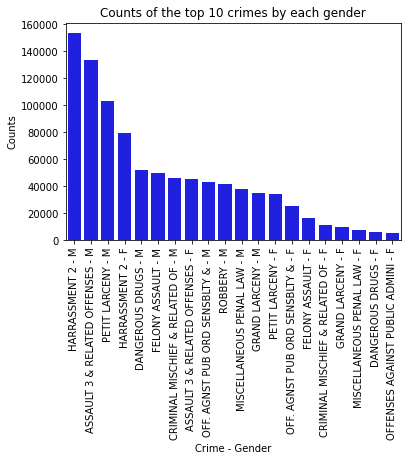

In [11]:
#group data by OFFNS_DESC and SEX and get counts
crimes_by_sex = ny_complaint.groupby(['OFNS_DESC', 'SUSP_SEX']).size().reset_index(name = 'counts')

#get top 5 crimes for each sex
top_10_crimes_female = crimes_by_sex[crimes_by_sex['SUSP_SEX'] == 'F'].nlargest(10, 'counts')
top_10_crimes_male = crimes_by_sex[crimes_by_sex['SUSP_SEX'] == 'M'].nlargest(10, 'counts')

#combine both frames
combined = top_10_crimes_female.append(top_10_crimes_male)
combined = combined.sort_values(by = 'counts',ascending = False)
combined['x_axis'] = combined['OFNS_DESC'] + ' - ' + combined['SUSP_SEX']

#create barplot, set labels and title
sns.barplot(data = combined, x = 'x_axis', y = 'counts', color = 'blue')
plt.xlabel('Crime - Gender')
plt.ylabel('Counts')
plt.title('Counts of the top 10 crimes by each gender')
plt.xticks(rotation = 90)
plt.show()

# Description:

This bar chart shows the counts of the top 10 crimes by male and female suspects. It allows for a comparison between the committed crimes by male and female suspects and can help to see patterns or trends in the committed crimes by each gender. It is a fair representation of the data, because the viewer can easily spot the most common crimes for both male and female suspects and compare them with each other.